In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
import numpy as np
import os

### Load the experiment and corresponding libraries

In [2]:
sys.path.append("/")  # enable import of "recipe"
os.chdir("/work/")

In [3]:
from recipes.main import load_experiment
experiment = load_experiment(recipe="_2020_06_23_rewrite", 
                             experiment="noisy_transfer_tasks", 
                             schema="",  # schema name will automatically be generated from recipe and experiment names 
                             base_dir="/recipes/",
                             import_prefix="recipes.", 
                             dev_mode=True  
                            )

Connecting anix@134.2.168.16:3306


In [4]:
from bias_transfer.tables.trained_model import *
from bias_transfer.tables.trained_transfer_model import *
schema

Connecting anix@134.2.168.16:3306


Schema `anix_nnfabrik_2020_06_23_rewrite`

In [5]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__trained_model,d058e7e4dd29da7adbde150bcf8f469f,error,=BLOB=,NameError: name 'kwargs' is not defined,=BLOB=,anix@134.2.168.88,d21f55bf814c,1,92738,2020-07-09 11:12:44
__trained_model,d73dea9e9e25ad7e82d1f12d528c87a0,error,=BLOB=,KeyError: 'NoiseAdvTraining',=BLOB=,anix@134.2.168.88,fdc60a5dcd30,1,93206,2020-07-09 11:23:50


In [24]:
exp = next(iter(experiment.experiments.values()))
rest = exp.get_restrictions()
rest

[{'dataset_hash': 'a3af8dee89bd664deb526c36109ac826',
  'dataset_fn': 'bias_transfer.dataset.img_dataset_loader',
  'model_hash': '03aa3f243c6dff81fb6530f329cb6f8c',
  'model_fn': 'bias_transfer.models.classification_cnn_builder',
  'trainer_hash': 'abe336584621e6f0a73bbfa043b502b0',
  'trainer_fn': 'bias_transfer.trainer.img_classification',
  'seed': 42}]

In [22]:
TrainedModel() 

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,0b54e68a1bb5fa82bffd24a7d9946d58,42,Noise Augmented lottery-ticket SGD.SVHN.SVHN,11.5665,=BLOB=,Arne Nix,2020-07-07 08:01:01
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,1c01e68c75c1c106238b3c66781cef94,42,Clean lottery-ticket SGD.SVHN.SVHN,11.6933,=BLOB=,Arne Nix,2020-07-07 17:47:36
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,45eac9e16b0b0c0c81cf6d3265c1bfd0,42,Clean lottery-ticket SGD.SVHN.SVHN,15.9381,=BLOB=,Arne Nix,2020-07-06 19:37:42
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,64444ee4f084058a569ffddc0f6feab8,42,SGD Noise Augmented.SVHN.SVHN,95.8858,=BLOB=,Arne Nix,2020-07-06 10:06:52
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,720c7babca0718297e87fbcc22f9f048,42,Clean lottery-ticket SGD.SVHN.SVHN,11.071,=BLOB=,Arne Nix,2020-07-07 17:45:48
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,86933a7cc74905263cd34dd9cdf3165f,42,Noise Augmented lottery-ticket SGD.SVHN.SVHN,9.69192,=BLOB=,Arne Nix,2020-07-06 11:01:35
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,b34284d47b6884220a1fc51f65cff011,42,Noise Augmented lottery-ticket SGD.SVHN.SVHN,11.071,=BLOB=,Arne Nix,2020-07-07 17:51:49
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,c4ef58f167ed31ac36751da586506c02,42,Clean.SVHN.SVHN,95.7821,=BLOB=,Arne Nix,2020-07-06 13:17:04
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,d224f3427a11f9f6b292376138a50cbf,42,Noise Augmented lottery-ticket SGD.SVHN.SVHN,9.69192,=BLOB=,Arne Nix,2020-07-07 08:02:04
bias_transfer.models.classification_cnn_builder,03aa3f243c6dff81fb6530f329cb6f8c,bias_transfer.dataset.img_dataset_loader,a3af8dee89bd664deb526c36109ac826,bias_transfer.trainer.img_classification,d3b78530d7992959edb8802fbb45e6cc,42,Noise Augmented.SVHN.SVHN,96.2124,=BLOB=,Arne Nix,2020-07-06 10:08:49


### Analyse the results

In [8]:
from bias_transfer.configs.base import Description

In [9]:
list(experiment.experiments.keys())

[Description(name='SVHN: Clean', seed=42),
 Description(name='SVHN: Noise Augmented', seed=42),
 Description(name='SVHN: Noise Augmented + Adv Regression', seed=42),
 Description(name='MNIST: Noise Augmented', seed=42),
 Description(name='MNIST: Clean', seed=42),
 Description(name='SVHN: Noise Augmented + Repr Matching (core,avg)', seed=42)]

In [8]:
try:
    from bias_transfer.analysis.results.analyzer_tracker import Analyzer
except:
    from bias_transfer.analysis.results.analyzer import Analyzer
import seaborn as sns
import pandas as pd

In [40]:
analysis = Analyzer()

In [41]:
analysis.add_data(experiment.transfer_experiments, TrainedModel(), transfer_level=0)

{Description(name='MNIST Clean', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05de81cfd0>,
 Description(name='MNIST Noise Augmented', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05dc306d60>,
 Description(name='SVHN Clean -> MNIST Transfer (No Freeze)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05d75677f0>,
 Description(name='SVHN Noise Augmented -> MNIST Transfer (No freeze)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05d7567a60>,
 Description(name='SVHN Noise Augmented -> MNIST Transfer (Core Freeze)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05de81cfa0>,
 Description(name='SVHN Noise Augmented -> MNIST Transfer (Core + BN Freeze)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05dc306a00>,
 Description(name='SVHN Noise Augmented + Repr Matching (core,avg) -> MNIST Transfer', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 

In [42]:
analysis.add_data(experiment.transfer_experiments, TrainedTransferModel(), transfer_level=1)

{Description(name='MNIST Clean', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05de81cfd0>,
 Description(name='MNIST Noise Augmented', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05dc306d60>,
 Description(name='SVHN Clean -> MNIST Transfer (No Freeze)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05e1ca7940>,
 Description(name='SVHN Noise Augmented -> MNIST Transfer (No freeze)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05de843520>,
 Description(name='SVHN Noise Augmented -> MNIST Transfer (Core Freeze)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05de8439a0>,
 Description(name='SVHN Noise Augmented -> MNIST Transfer (Core + BN Freeze)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f05de848ee0>,
 Description(name='SVHN Noise Augmented + Repr Matching (core,avg) -> MNIST Transfer', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 

/src/ml-utils/mlutils/tracking.py:144: RuntimeWarning: invalid value encountered in true_divide
  n_log[key] = l / norm


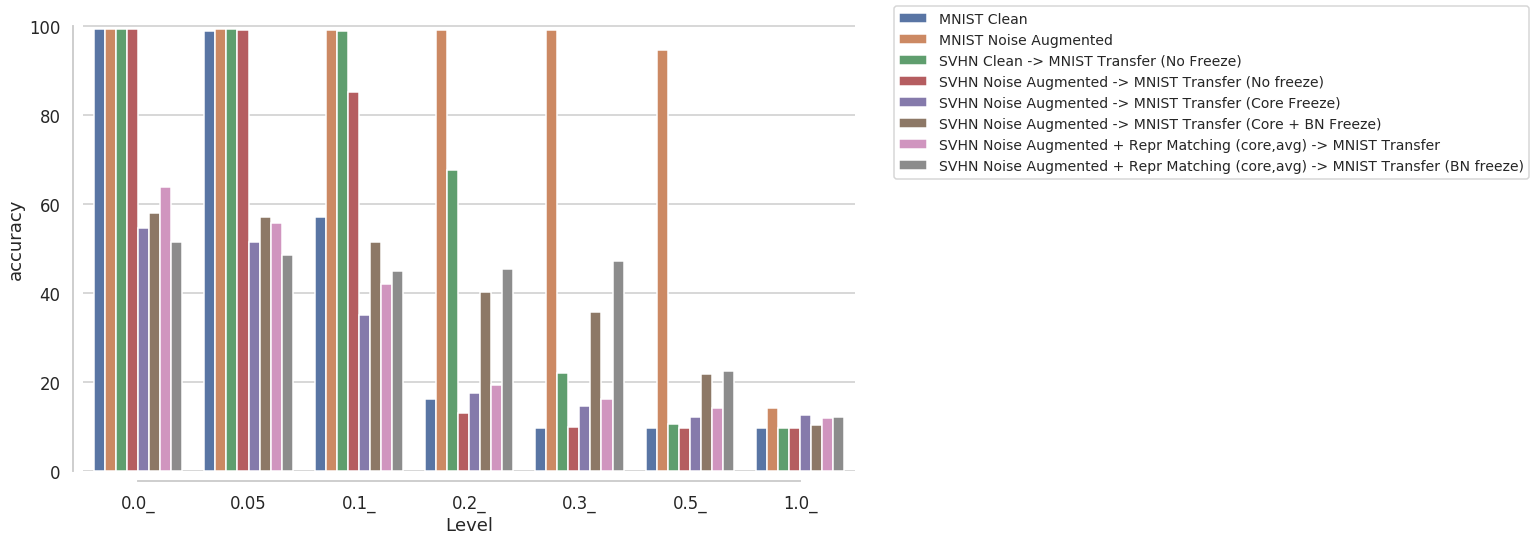

In [43]:
analysis.plot_noise_eval(bn_train=False, save="")

/src/ml-utils/mlutils/tracking.py:144: RuntimeWarning: invalid value encountered in true_divide
  n_log[key] = l / norm


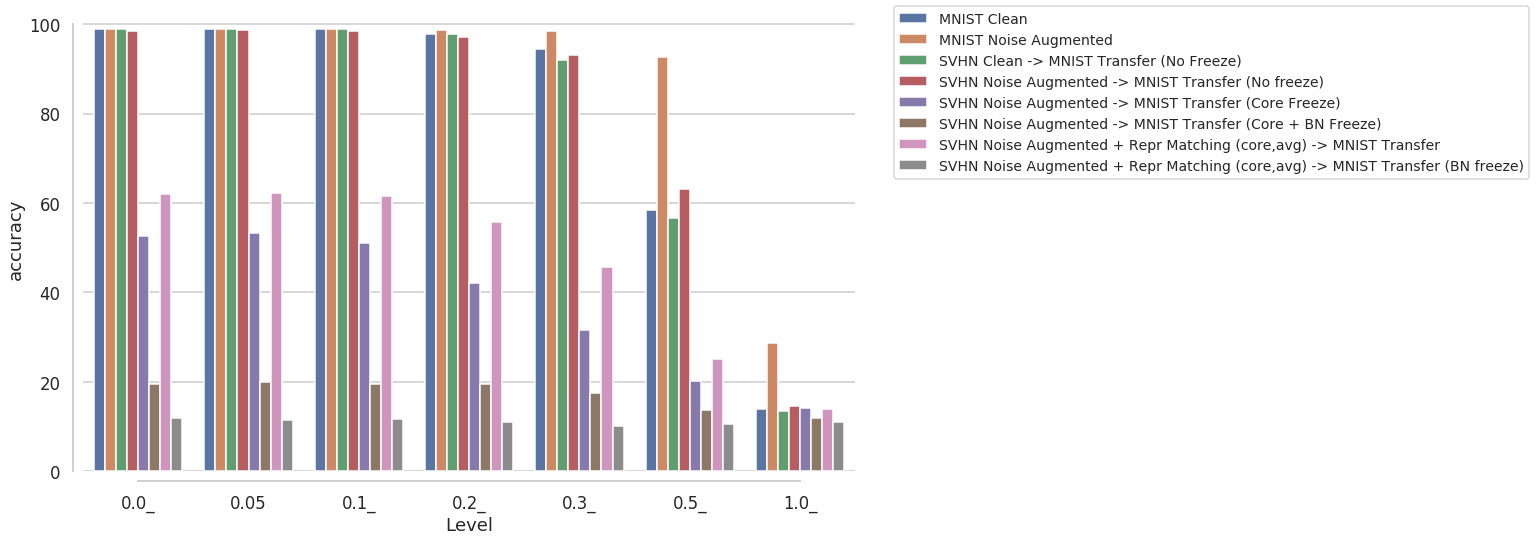

In [44]:
analysis.plot_noise_eval(bn_train=True, save="")

In [20]:
list(next(iter(analysis.data.values())).log.keys())

['LR',
 'Training',
 'Validation',
 'Noise noise_snr 5.0_1.0 BN=Train',
 'Noise noise_snr 4.0_1.0 BN=Train',
 'Noise noise_snr 3.0_1.0 BN=Train',
 'Noise noise_snr 2.0_1.0 BN=Train',
 'Noise noise_snr 1.0_1.0 BN=Train',
 'Noise noise_snr 0.5_1.0 BN=Train',
 'Noise noise_snr 0.0_1.0 BN=Train',
 'Noise noise_std 0.0_1.0 BN=Train',
 'Noise noise_std 0.05_1.0 BN=Train',
 'Noise noise_std 0.1_1.0 BN=Train',
 'Noise noise_std 0.2_1.0 BN=Train',
 'Noise noise_std 0.3_1.0 BN=Train',
 'Noise noise_std 0.5_1.0 BN=Train',
 'Noise noise_std 1.0_1.0 BN=Train',
 'Test BN=Train',
 'zoom_blur BN=Train',
 'gaussian_blur BN=Train',
 'fog BN=Train',
 'jpeg_compression BN=Train',
 'elastic_transform BN=Train',
 'contrast BN=Train',
 'speckle_noise BN=Train',
 'brightness BN=Train',
 'gaussian_noise BN=Train',
 'defocus_blur BN=Train',
 'saturate BN=Train',
 'pixelate BN=Train',
 'motion_blur BN=Train',
 'snow BN=Train',
 'shot_noise BN=Train',
 'glass_blur BN=Train',
 'spatter BN=Train',
 'frost BN=Train'

In [16]:
analysis.calculate_c_scores()

/src/ml-utils/mlutils/tracking.py:144: RuntimeWarning: invalid value encountered in true_divide
  n_log[key] = l / norm


,1,2,3,4,5,0,Corruption,Mean,mCE
name,,,,,,,,,
download,64.162,57.808,47.570,29.342,18.066,76.142,shot_noise,51.151667,57.216629
download,57.386,52.916,47.766,33.318,18.120,76.142,impulse_noise,52.392000,56.762730
download,65.084,60.908,50.926,35.548,16.792,76.142,gaussian_noise,49.100000,55.417607
download,59.142,52.888,39.674,28.248,18.802,76.142,defocus_blur,54.184000,66.078049
download,63.920,53.946,37.092,21.100,14.202,76.142,motion_blur,55.599667,70.737489
download,57.738,45.492,22.090,16.560,11.772,76.142,glass_blur,61.701000,74.698547
download,53.822,44.144,36.086,29.600,23.292,76.142,zoom_blur,56.152333,70.366332
download,72.050,70.290,67.296,62.584,56.112,76.142,brightness,32.587667,57.677286
download,59.448,53.178,44.024,36.930,21.318,76.142,fog,51.493333,62.873423


In [20]:
analysis.add_data(experiment.transfer_experiments, TrainedTransferModel(), transfer_level=1)

{Description(name='CIFAR10: Clean', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f4e25d02be0>,
 Description(name='CIFAR10: Noise Augmented', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f4e25d02e50>,
 Description(name='CIFAR10: Noise Augmented + Repr Matching (blocks,avg)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f4e25d02c40>,
 Description(name='CIFAR10: Noise Augmented + Repr Matching (logits,avg)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f4e25d02c70>,
 Description(name='CIFAR10: Noise Augmented + Repr Matching (core,avg)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f4e1a9d6220>,
 Description(name='CIFAR10: Noise Augmented + Repr Matching (all,avg)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker at 0x7f4e1a9d6d90>,
 Description(name='CIFAR10: Noise Augmented + Repr Matching (all core,avg)', seed=42): <mlutils.tracking.AdvancedMultipleObjectiveTracker

In [32]:
analysis.df

,name,comment,training_progress,dev_eval,epoch,test_epoch_loss,test_eval,dev_noise_eval,dev_noise_eval_bn_train,dev_noise_loss,dev_noise_loss_bn_train,c_test_eval,c_test_loss
0,"CIFAR10: Noise Augmented + Repr Matching (all,...",Noise Augmented + Repr. Matching (Euclid; clea...,[{'train_results': {'epoch_loss': 1.7184122292...,85.20,200,0.460417,87.63,"{'noise_snr': {'5.0_1.0': 88.04, '4.0_1.0': 87...","{'noise_snr': {'5.0_1.0': 88.04, '4.0_1.0': 87...","{'noise_snr': {'5.0_1.0': 0.42113626599311826,...","{'noise_snr': {'5.0_1.0': 0.42113626599311826,...","{'zoom_blur': {1: 83.38, 2: 83.0, 3: 81.0, 4: ...","{'zoom_blur': {1: 0.5976790346205234, 2: 0.613..."
1,"CIFAR10: Noise Augmented + Repr Matching (all,...",Noise Augmented + Repr. Matching (Euclid; clea...,[{'train_results': {'epoch_loss': 1.7255045426...,85.04,200,0.456258,87.54,"{'noise_snr': {'5.0_1.0': 87.72, '4.0_1.0': 87...","{'noise_snr': {'5.0_1.0': 87.72, '4.0_1.0': 87...","{'noise_snr': {'5.0_1.0': 0.40947526693344116,...","{'noise_snr': {'5.0_1.0': 0.40947526693344116,...","{'zoom_blur': {1: 82.91, 2: 82.27, 3: 80.16, 4...","{'zoom_blur': {1: 0.604834432899952, 2: 0.6270..."
2,"CIFAR10: Noise Augmented + Repr Matching (all,...",Noise Augmented + Repr. Matching (Euclid; clea...,[{'train_results': {'epoch_loss': 1.9416351508...,84.00,121,0.693684,85.68,"{'noise_snr': {'5.0_1.0': 86.46, '4.0_1.0': 86...","{'noise_snr': {'5.0_1.0': 86.46, '4.0_1.0': 86...","{'noise_snr': {'5.0_1.0': 0.44366788268089297,...","{'noise_snr': {'5.0_1.0': 0.44366788268089297,...","{'zoom_blur': {1: 82.04, 2: 81.66, 3: 80.23, 4...","{'zoom_blur': {1: 0.7957127436995506, 2: 0.795..."
3,"CIFAR10: Noise Augmented + Repr Matching (all,...",Noise Augmented + Repr. Matching (Euclid; clea...,[{'train_results': {'epoch_loss': 1.7028769552...,84.60,161,0.465834,87.99,"{'noise_snr': {'5.0_1.0': 87.26, '4.0_1.0': 86...","{'noise_snr': {'5.0_1.0': 87.26, '4.0_1.0': 86...","{'noise_snr': {'5.0_1.0': 0.43204711079597474,...","{'noise_snr': {'5.0_1.0': 0.43204711079597474,...","{'zoom_blur': {1: 82.78, 2: 82.06, 3: 80.11, 4...","{'zoom_blur': {1: 0.6187595877796411, 2: 0.664..."
4,"CIFAR10: Noise Augmented + Repr Matching (all,...",Noise Augmented + Repr. Matching (Euclid; clea...,[{'train_results': {'epoch_loss': 1.7067455703...,84.06,121,0.477245,87.35,"{'noise_snr': {'5.0_1.0': 86.7, '4.0_1.0': 86....","{'noise_snr': {'5.0_1.0': 86.7, '4.0_1.0': 86....","{'noise_snr': {'5.0_1.0': 0.42883776426315307,...","{'noise_snr': {'5.0_1.0': 0.42883776426315307,...","{'zoom_blur': {1: 82.3, 2: 81.57, 3: 79.58, 4:...","{'zoom_blur': {1: 0.629573854804039, 2: 0.6670..."
5,"CIFAR10: Noise Augmented + Repr Matching (all,...",Noise Augmented + Repr. Matching (Euclid; clea...,[{'train_results': {'epoch_loss': 1.7448860142...,82.96,131,0.705159,85.83,"{'noise_snr': {'5.0_1.0': 85.58, '4.0_1.0': 85...","{'noise_snr': {'5.0_1.0': 85.58, '4.0_1.0': 85...","{'noise_snr': {'5.0_1.0': 0.46154125928878786,...","{'noise_snr': {'5.0_1.0': 0.46154125928878786,...","{'zoom_blur': {1: 81.54, 2: 81.14, 3: 79.79, 4...","{'zoom_blur': {1: 0.842802032828331, 2: 0.8470..."
6,"CIFAR10: Noise Augmented + Repr Matching (all,...",Noise Augmented + Repr. Matching (Euclid; clea...,[{'train_results': {'epoch_loss': 1.6957799975...,84.76,191,0.479995,87.22,"{'noise_snr': {'5.0_1.0': 87.34, '4.0_1.0': 86...","{'noise_snr': {'5.0_1.0': 87.34, '4.0_1.0': 86...","{'noise_snr': {'5.0_1.0': 0.4273102000355721, ...","{'noise_snr': {'5.0_1.0': 0.4273102000355721, ...","{'zoom_blur': {1: 82.47, 2: 82.08, 3: 80.18, 4...","{'zoom_blur': {1: 0.6417012296617031, 2: 0.668..."
7,"CIFAR10: Noise Augmented + Repr Matching (all,...",Noise Augmented + Repr. Matching (Euclid; clea...,[{'train_results': {'epoch_loss': 1.6866050511...,84.72,175,0.510281,86.69,"{'noise_snr': {'5.0_1.0': 86.98, '4.0_1.0': 86...","{'noise_snr': {'5.0_1.0': 86.98, '4.0_1.0': 86...","{'noise_snr': {'5.0_1.0': 0.4372184813022614, ...","{'noise_snr': {'5.0_1.0': 0.4372184813022614, ...","

In [19]:
analysis.add_data(experiment.transfer_experiments, TrainedTransferModel2(), transfer_level=2)

In [16]:
TrainedTransferModel()

collapsed_key,model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
412411aa41bedf968396a83485ca19b8,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,22b49996eba676ffbb1acadb816ad049,42,Transfer + Reset.CIFAR10.CIFAR10,39.08,=BLOB=,Arne Nix,2020-06-25 21:27:24
412411aa41bedf968396a83485ca19b8,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,5aa67fff8fcb28c6d595aa8578fe7d0b,42,Transfer + Reset.CIFAR10.CIFAR10,39.08,=BLOB=,Arne Nix,2020-06-25 20:26:27
7302ef91156b5538c085ea7d64322721,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,22b49996eba676ffbb1acadb816ad049,42,Transfer + Reset.CIFAR10.CIFAR10,29.1,=BLOB=,Arne Nix,2020-06-25 22:20:35
7302ef91156b5538c085ea7d64322721,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,5aa67fff8fcb28c6d595aa8578fe7d0b,42,Transfer + Reset.CIFAR10.CIFAR10,29.1,=BLOB=,Arne Nix,2020-06-25 20:35:20
7bd435c5da43b1ed7f402b98e2e61bfa,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,22b49996eba676ffbb1acadb816ad049,42,Transfer + Reset.CIFAR10.CIFAR10,37.1,=BLOB=,Arne Nix,2020-06-25 21:28:45
7bd435c5da43b1ed7f402b98e2e61bfa,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,5aa67fff8fcb28c6d595aa8578fe7d0b,42,Transfer + Reset.CIFAR10.CIFAR10,37.1,=BLOB=,Arne Nix,2020-06-25 20:26:20
cf13c72be781b35052de97589d56e1b1,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,22b49996eba676ffbb1acadb816ad049,42,Transfer + Reset.CIFAR10.CIFAR10,27.63,=BLOB=,Arne Nix,2020-06-25 23:58:29
cf13c72be781b35052de97589d56e1b1,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,5aa67fff8fcb28c6d595aa8578fe7d0b,42,Transfer + Reset.CIFAR10.CIFAR10,27.63,=BLOB=,Arne Nix,2020-06-25 22:55:33
e46574507de4ae4b7d55e0ccf45e9009,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,22b49996eba676ffbb1acadb816ad049,42,Transfer + Reset.CIFAR10.CIFAR10,38.68,=BLOB=,Arne Nix,2020-06-25 20:49:37
e46574507de4ae4b7d55e0ccf45e9009,bias_transfer.models.classification_cnn_builder,3e7d02a5cd5dc44ba97e02a417d69fcb,bias_transfer.dataset.img_dataset_loader,02aa74b22c3c16a82160c52ccb35ac55,bias_transfer.trainer.img_classification,5aa67fff8fcb28c6d595aa8578fe7d0b,42,Transfer + Reset.CIFAR10.CIFAR10,38.68,=BLOB=,Arne Nix,2020-06-25 21:52:28


In [33]:
analysis.plot(
    to_plot="dev_noise_eval", 
        save="rep_matching_all",
        style="lightpaper",
#     legend_outside=True
       )

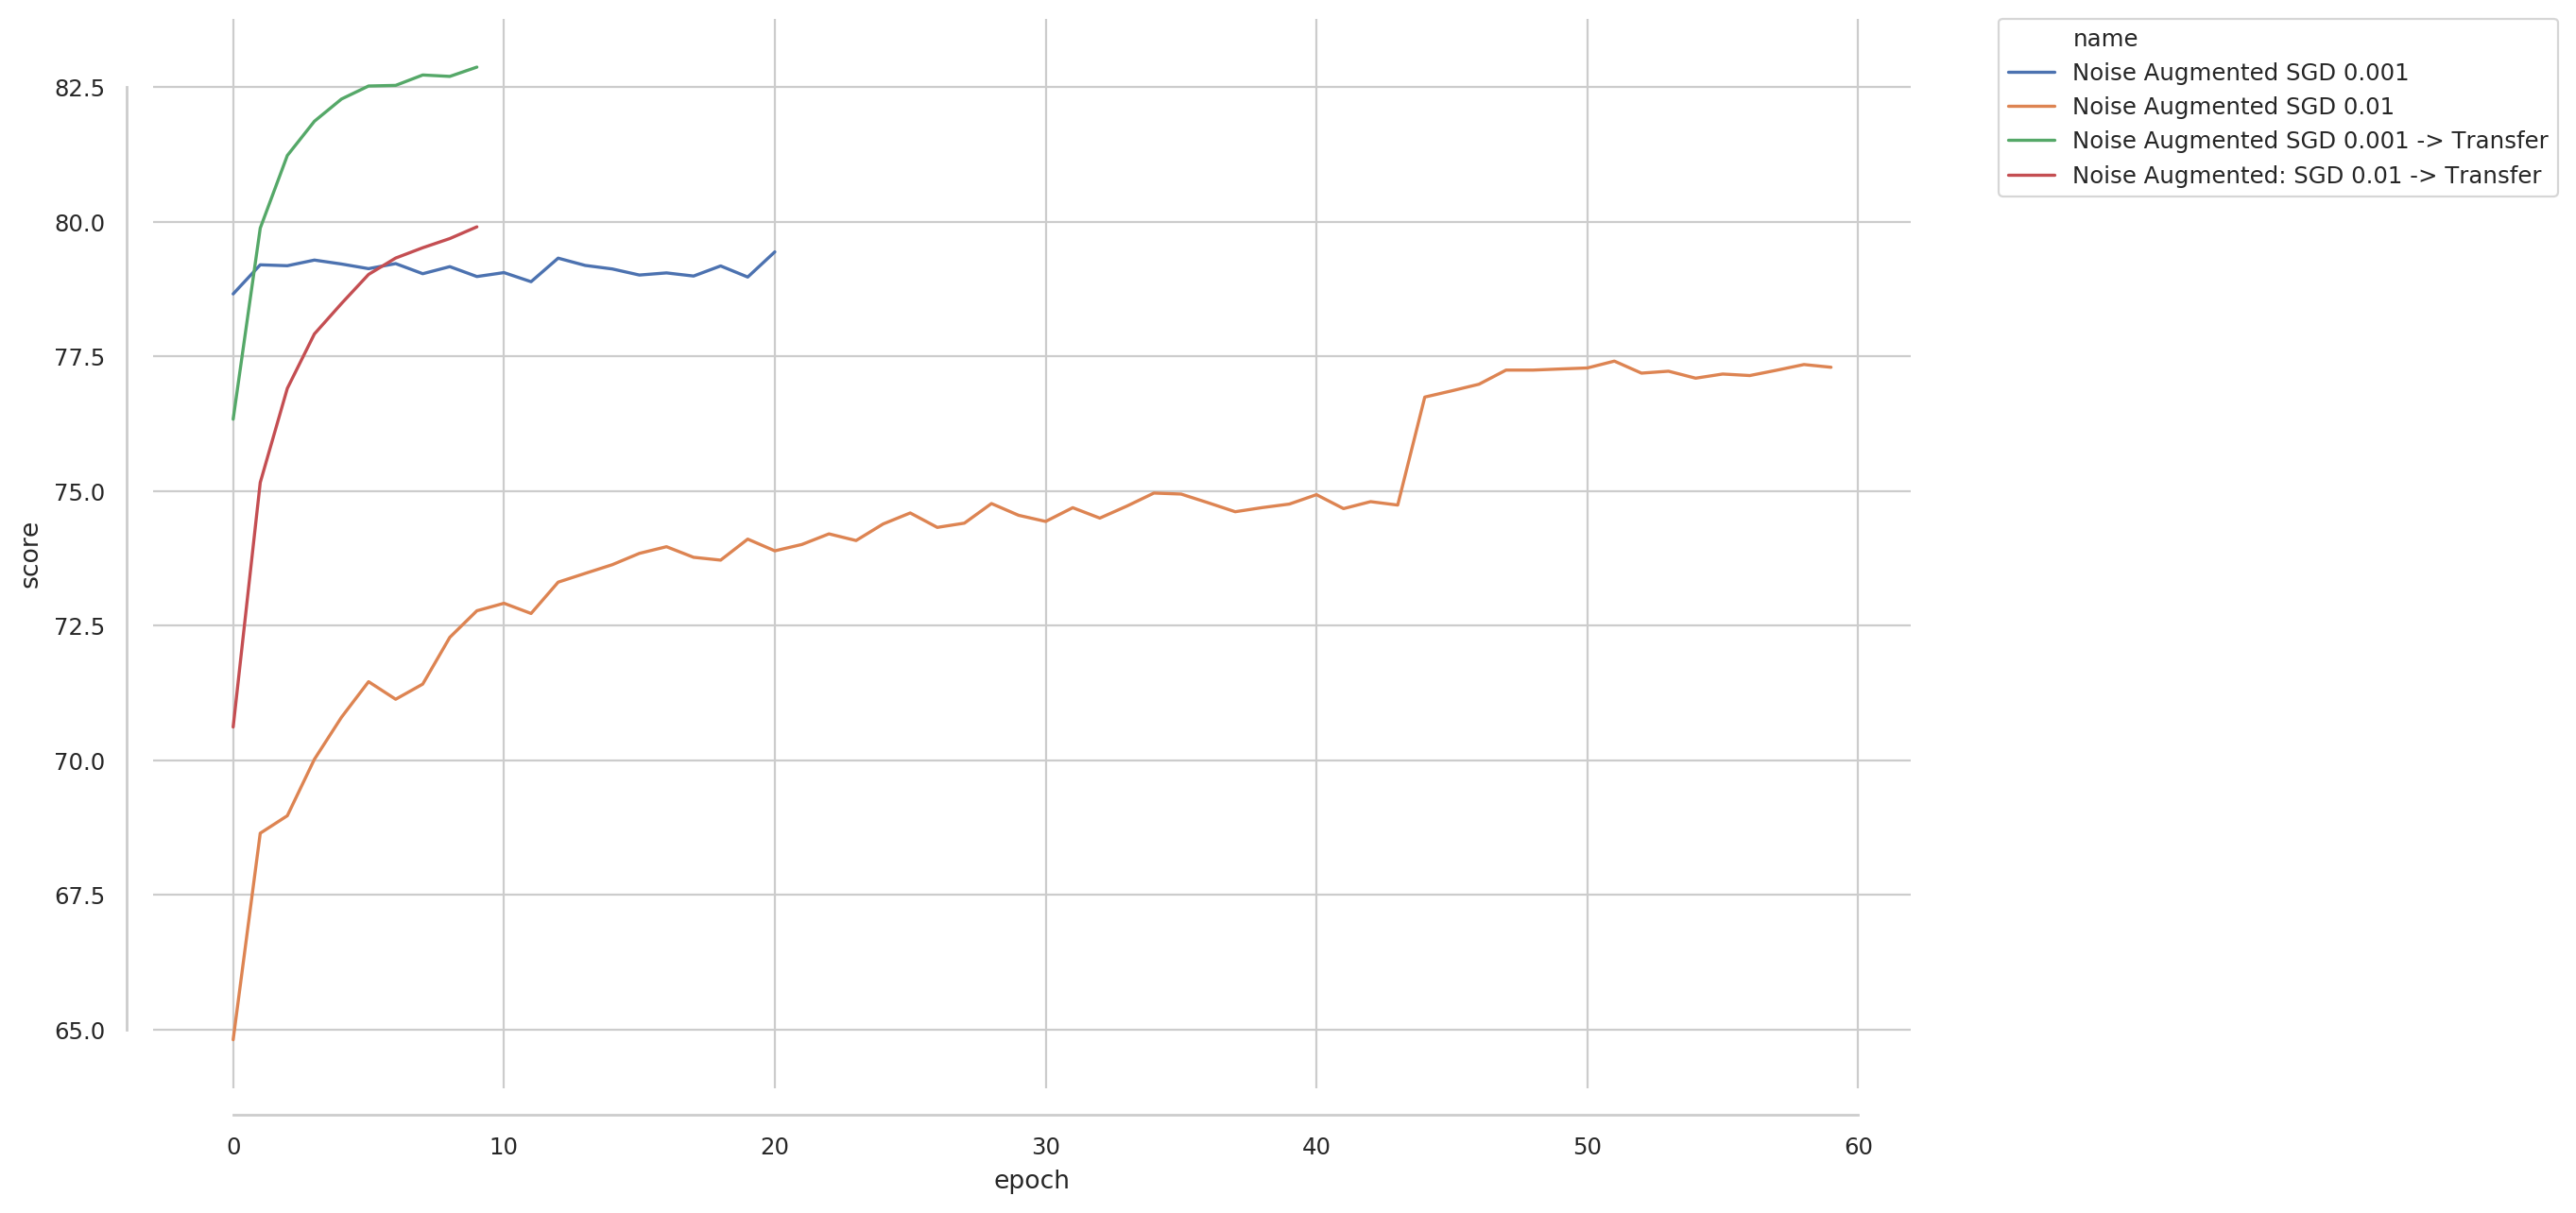

In [21]:
analysis.plot(
    to_plot="training_progress", 
        save="",
        style="lightpaper",
#     legend_outside=False
       )

No handles with labels found to put in legend.


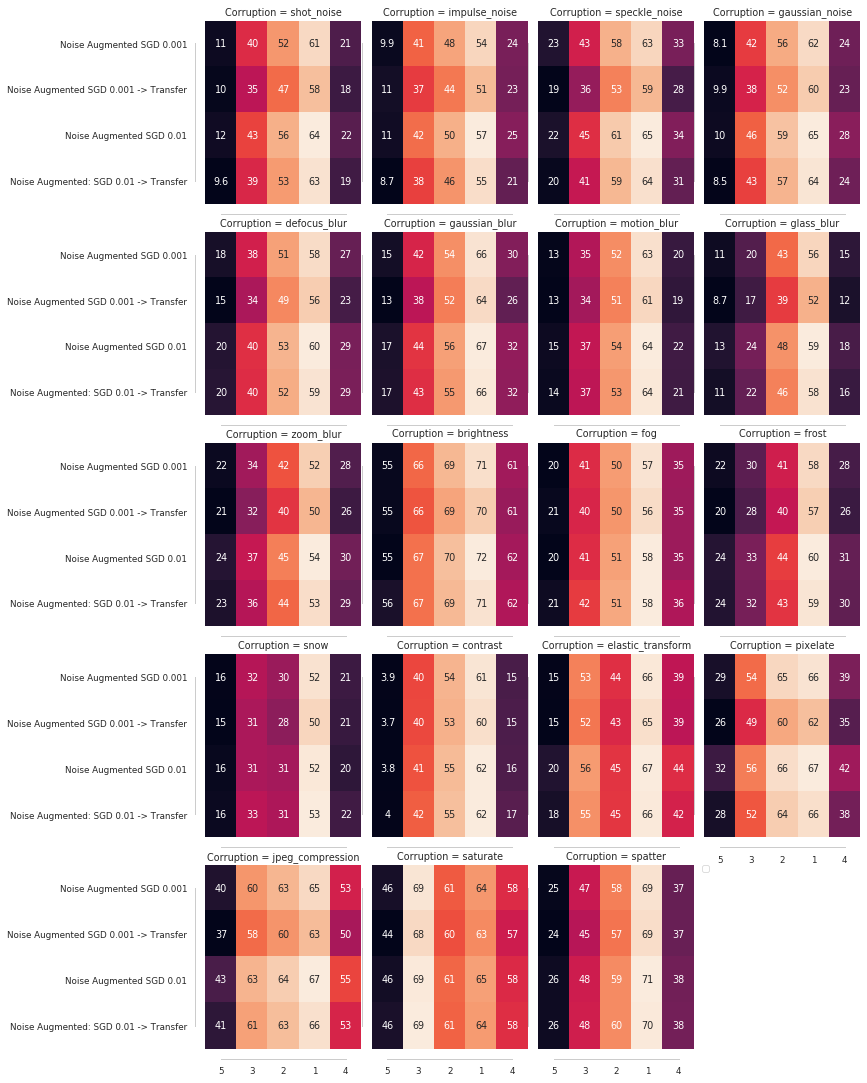

In [22]:
analysis.plot(
    to_plot="c_test_eval", 
        save="",
        style="lightpaper",
#     legend_outside=False
       )

In [24]:
corruption_map = {
    "shot_noise": "Shot Noise",
    "impulse_noise": "Impulse Noise",
    "speckle_noise": "Speckle Noise",
    "gaussian_noise": "Gaussian Noise",
    "defocus_blur": "Defocus Blur",
    "gaussian_blur": "Gauss Blur",
    "motion_blur": "Motion Blur",
    "glass_blur": "Glass Blur",
    "zoom_blur": "Zoom Blur",
    "brightness": "Brightness",
    "fog": "Fog",
    "frost": "Frost",
    "snow": "Snow",
    "contrast": "Contrast",
    "elastic_transform": "Elastic Transform",
    "pixelate": "Pixelate",
    "jpeg_compression": "JPEG Compression",
    "saturate": "Saturate",
    "spatter": "Spatter",
}

Res_Alex_Net_mean = dict()
Res_Alex_Net_mean["Gaussian Noise"] = 0.886
Res_Alex_Net_mean["Shot Noise"] = 0.894
Res_Alex_Net_mean["Impulse Noise"] = 0.923
Res_Alex_Net_mean["Defocus Blur"] = 0.820
Res_Alex_Net_mean["Gauss Blur"] = 0.826
Res_Alex_Net_mean["Glass Blur"] = 0.826
Res_Alex_Net_mean["Motion Blur"] = 0.786
Res_Alex_Net_mean["Zoom Blur"] = 0.798
Res_Alex_Net_mean["Snow"] = 0.867
Res_Alex_Net_mean["Frost"] = 0.827
Res_Alex_Net_mean["Fog"] = 0.819
Res_Alex_Net_mean["Brightness"] = 0.565
Res_Alex_Net_mean["Contrast"] = 0.853
Res_Alex_Net_mean["Elastic Transform"] = 0.646
Res_Alex_Net_mean["Pixelate"] = 0.718
Res_Alex_Net_mean["JPEG Compression"] = 0.607
Res_Alex_Net_mean["Speckle Noise"] = 0.845
Res_Alex_Net_mean["Spatter"] = 0.718
Res_Alex_Net_mean["Saturate"] = 0.658

def extract_c_test_results(analysis, to_extract="c_test_eval"):
    corruptions = (
        "shot_noise",
        "impulse_noise",
#         "speckle_noise",
        "gaussian_noise",
        "defocus_blur",
#         "gaussian_blur",
        "motion_blur",
        "glass_blur",
        "zoom_blur",
        "brightness",
        "fog",
        "frost",
        "snow",
        "contrast",
        "elastic_transform",
        "pixelate",
        "jpeg_compression",
#         "saturate",
#         "spatter",
    )
    data = analysis.df[to_extract].apply(pd.Series)
    data_to_plot = pd.DataFrame()
    for corruption in corruptions:
        if corruption not in data.columns:
            continue
        data_ = data[corruption].apply(pd.Series)
        data_ = pd.concat([analysis.df["name"], analysis.df["test_eval"], data_], axis=1)
        data_ = data_.groupby("name").mean()
        data_["Corruption"] = corruption
        data_to_plot = pd.concat([data_to_plot, data_], axis=0, sort=True)
    return data_to_plot

def calculate_c_scores(analysis):
    c_data = extract_c_test_results(analysis)
    df_ = c_data[c_data.columns[0:6]].apply(lambda x: 100 - x)
    c_data = pd.concat([c_data, df_[df_.columns[0:6]].mean(axis=1)], axis=1)

    def normalize_alexnet(row):
        mean_error = row[0]
        corruption = row["Corruption"]
        ce = mean_error / Res_Alex_Net_mean[corruption_map[corruption]]
        return pd.concat([row, pd.Series({"mCE": ce})])

    c_data = c_data.apply(normalize_alexnet, axis=1)
    c_data = c_data.groupby("name").mean()
    return c_data

In [25]:
calculate_c_scores(analysis)

,test_eval,5,3,2,1,4,0,mCE
name,,,,,,,,
Noise Augmented SGD 0.001,75.346,19.5104,41.742800,50.699600,60.225467,29.956267,53.753244,68.143558
Noise Augmented SGD 0.001 -> Transfer,75.306,18.8244,39.366267,48.213867,58.169867,28.516000,55.267267,70.079724
Noise Augmented SGD 0.01,75.496,21.1784,43.760267,52.634267,61.865733,31.858667,52.201111,66.157750
Noise Augmented: SGD 0.01 -> Transfer,75.526,20.2804,42.565333,51.607067,61.097067,30.727867,53.032711,67.206352


In [27]:
schema.jobs.delete()

In [25]:
# delete all jobs in error state:
if schema.database != "nnfabrik_core": 
    (schema.jobs & "status='error'").delete()

In [27]:
import datajoint as dj

In [34]:
dj.connection.conn()

DataJoint connection (connected) anix@sinzlab.chlkmukhxp6i.eu-central-1.rds.amazonaws.com:3306

In [36]:

import datajoint as dj2

In [37]:
dj2.connection.conn()

DataJoint connection (connected) anix@sinzlab.chlkmukhxp6i.eu-central-1.rds.amazonaws.com:3306